##  Demonstrating PCA and LDA. Art of reducing fetaures which makes trainging less time or resource consuming.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

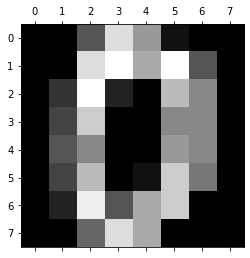

In [4]:
# Printing single digit to check representation in pixels

# As explained in DESCR: 8x8 image of integer pixels in the range 0..16
first_digit = data.data[0].reshape(8,8)
plt.gray()
plt.matshow(first_digit)

# plt.matshow(data.data[8].reshape(8,8))

###  Preparing data for modal training

In [5]:
x_features = pd.DataFrame(data=data.data, columns=data.feature_names)
y_target = data.target

# print(x_features.head())
# print("=========")
# print("Unique Target: ", np.unique(y_target))
# print("=========")
# print("Target Size: ",y_target.size)

####  Modal training

In [6]:
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(x_features, y_target, test_size=0.3, random_state=1, stratify=y_target)
x_simple_train.shape, x_simple_test.shape, y_simple_train.shape, y_simple_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [7]:
x_simple_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
230,0.0,3.0,15.0,13.0,12.0,8.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,2.0,15.0,16.0,2.0,0.0,0.0,0.0
919,0.0,0.0,0.0,2.0,14.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0
799,0.0,2.0,11.0,14.0,10.0,1.0,0.0,0.0,0.0,6.0,...,7.0,0.0,0.0,1.0,12.0,16.0,16.0,10.0,0.0,0.0
448,0.0,0.0,4.0,13.0,14.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,7.0,13.0,13.0,8.0,0.0,0.0
1305,0.0,0.0,4.0,16.0,14.0,3.0,0.0,0.0,2.0,14.0,...,0.0,0.0,0.0,0.0,4.0,15.0,16.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,...,15.0,3.0,0.0,0.0,0.0,5.0,11.0,13.0,12.0,2.0
1662,0.0,0.0,7.0,15.0,16.0,12.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,10.0,12.0,1.0,0.0,0.0,0.0
665,0.0,0.0,0.0,1.0,7.0,15.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,0.0
582,0.0,0.0,0.0,9.0,16.0,6.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0


In [8]:
# max_iter increased to 3000 to help graditent desent converge.
lr_plain = LogisticRegression(max_iter=3000)
lr_plain.fit(x_simple_train, y_simple_train)

LogisticRegression(max_iter=3000)

In [9]:
score = lr_plain.score(x_simple_test, y_simple_test)
print("Accuracy: ", score*100, "%")

Accuracy:  96.29629629629629 %


### Scalling the features

In [10]:
std_scale = StandardScaler()
x_processed = std_scale.fit_transform(x_features)
# x_processed = x_features
x_processed.shape

(1797, 64)

####  Splitting training and test data

In [11]:
x_scl_train,x_scl_test,y_scl_train, y_scl_test = train_test_split(x_processed, y_target, test_size=0.3, random_state=1, stratify=y_target)
x_scl_train.shape, x_scl_test.shape, y_scl_train.shape, y_scl_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [12]:
x_scl_train

array([[ 0.        ,  2.97281114,  2.06063063, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.03999823,
        -0.5056698 , -0.19600752],
       [ 0.        ,  1.87020193,  1.21914597, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -1.09493684, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.20606875, -0.19600752],
       [ 0.        , -0.33501649, -0.46382335, ..., -1.14664746,
        -0.5056698 , -0.19600752]])

#### Training the Modal now

In [13]:
lr_scaled = LogisticRegression()
lr_scaled.fit(x_scl_train, y_scl_train)

y_scl_predicted = lr_scaled.predict(x_scl_test)

In [14]:
scl_score = lr_scaled.score(x_scl_test, y_scl_test)

print("Accuracy: ",scl_score*100, "%")

Accuracy:  96.85185185185186 %


## Applying PCA

In [15]:
pca = PCA(0.96)

x_pca = pca.fit_transform(x_processed)
x_pca.shape

(1797, 43)

In [16]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_target, test_size=0.3, random_state=1, stratify=y_target)
x_pca_train.shape, x_pca_test.shape, y_pca_train.shape, y_pca_test.shape

((1257, 43), (540, 43), (1257,), (540,))

In [17]:
x_pca_train

array([[-2.90373720e+00,  1.88449759e+00,  1.70158433e+00, ...,
         5.02328639e-01,  4.53678961e-01, -3.71411449e-02],
       [ 8.41186907e+00, -1.56283409e+00,  2.49301427e-01, ...,
         4.53978100e-01,  1.21207789e+00, -1.39282433e-01],
       [-3.92504713e+00,  1.18322375e-01, -1.63986826e+00, ...,
         1.31814348e-01, -2.23245100e-01, -1.79449619e-01],
       ...,
       [ 4.29058628e+00,  3.24260714e+00, -1.37229128e+00, ...,
        -3.36350286e-02, -6.66226048e-01, -1.50893659e-01],
       [ 2.12634685e+00, -3.52733893e+00,  1.20094398e+00, ...,
        -2.39786022e-02, -4.06952543e-03,  6.14287453e-01],
       [ 1.91510158e+00, -1.81564594e-01,  1.47476300e+00, ...,
         9.80604069e-01,  4.22682469e-01,  3.66502311e-01]])

In [18]:
lr_pca = LogisticRegression()
lr_pca.fit(x_pca_train, y_pca_train)

y_pca_predicted = lr_pca.predict(x_pca_test)

In [19]:
pca_score = lr_pca.score(x_pca_test, y_pca_test)
print("Accuracy: ",score*100, "%")

Accuracy:  96.29629629629629 %


### Implementation of LDA

In [20]:
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(x_processed, y_target)

In [21]:
x_lda.shape

(1797, 9)

In [22]:
x_lda_train, x_lda_test, y_lda_train, y_lda_test = train_test_split(x_lda, y_target, test_size=0.3, shuffle=1, stratify=y_target)
x_lda_train.shape, x_lda_test.shape, y_lda_train.shape, y_lda_test.shape

((1257, 9), (540, 9), (1257,), (540,))

In [23]:
lr_lda = LogisticRegression()
lr_lda.fit(x_lda_train, y_lda_train)

LogisticRegression()

In [24]:
score = lr_lda.score(x_lda_test, y_lda_test)
print("Accuracy: ", score * 100, "%")

Accuracy:  95.37037037037037 %


## Observations:
1. We reduced features from 64 to just 43 with very minor accuracy reduction which is good.
2. using LDA we reduced features to just 9 and with accuracy reduction is less thn 1 %.
3. Feature scaling helps to converge GD without increasing max_iter and help better accuracy.